<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> <font color="blue"> Solution for </font>First Quantum Programs with Qiskit </b></font>
<br>
_prepared by Abuzer Yakaryilmaz_
<br><br>

<a id="task2"></a>
<h3> Task 2: Randomly picking an 8-bit binary number </h3>

Design a quantum circuit with 8 quantum bits and 8 classical bits.

For each quantum bit, flip a coin by python, and apply x-gate if the outcome is head.

Measure your quantum bits.

Execute your circuit 10 times.

Repeat this task as much as you want, and enjoy your random choices.

<h3>Solution</h3>

x-gate is applied to the qubit with index 2
x-gate is applied to the qubit with index 3
x-gate is applied to the qubit with index 4
x-gate is applied to the qubit with index 5
x-gate is applied to the qubit with index 7


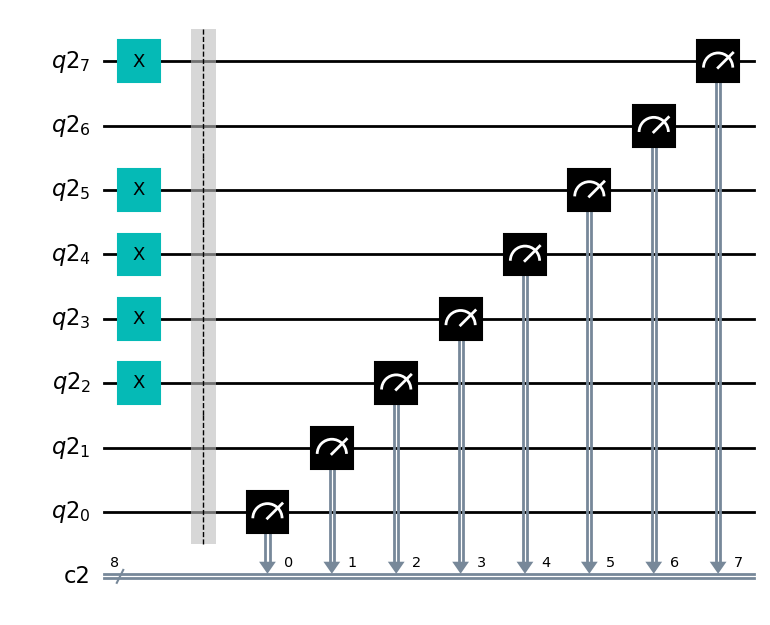

In [3]:
# we import all necessary methods and objects
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

# we use 8 qubits and 8 classical bits
q = QuantumRegister(8)
c = ClassicalRegister(8)

qc = QuantumCircuit(q,c)

# we store the index of each qubit to which x-gate is applied
picked_qubits=[] 

for i in range(8):
    if randrange(2) == 0: # Assume that 0 is Head and 1 is Tail
        qc.x(q[i]) # apply x-gate
        print("x-gate is applied to the qubit with index",i)
        picked_qubits.append(i) # i is picked

# define a barrier
qc.barrier()

# measurement 
qc.measure(q,c)  

# draw the circuit

display(qc.draw(output='mpl',reverse_bits=True))

In [ ]:
# execute the circuit and read the results
job = execute(qc,Aer.get_backend('aer_simulator_statevector'),shots=128)

counts = job.result().get_counts(qc)
        
print(counts)